# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import darklim

sys.path.append('/Users/vetri/GitRepos/DarkELF/')
from darkelf import darkelf

from IPython.utils import io
import datetime as dt
import time

%matplotlib inline
import matplotlib as mpl
mpl.rcParams['font.size'] = 14

# Signal Models

### Nuclear Recoils

/var/folders/st/tlbg96ms2yn949bx7bk8hjc00000gn/T/ipykernel_11414/3014182000.py:30: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


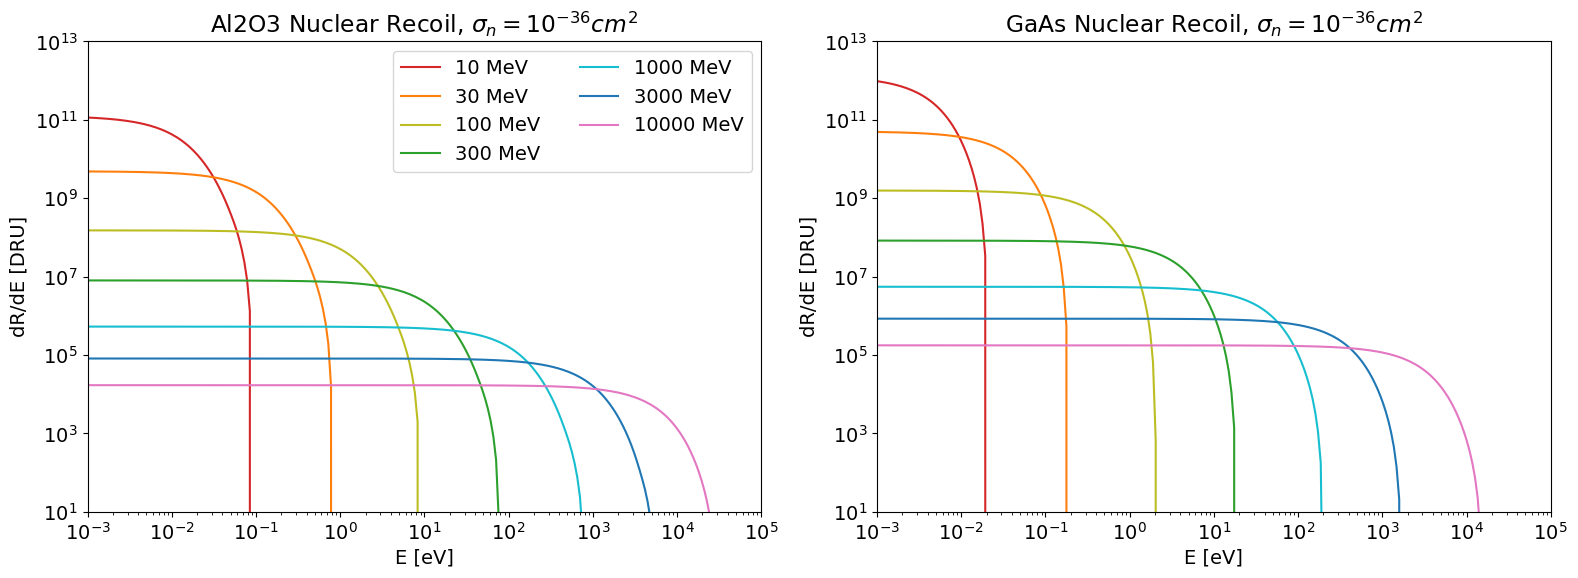

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

keV_arr = np.geomspace(1e-6, 100, 250)

for mX, color in zip([1e7, 3e7, 1e8, 3e8, 1e9, 3e9, 1e10], 
                     ['#d62728', '#ff7f0e', '#bcbd22', '#2ca02c', '#17becf', '#1f77b4','#e377c2', '#9467bd', '#8c564b']):

    dRdE_arr = darklim.limit._limit.drde(keV_arr, mX / 1e9, 1e-36, 'Al2O3')
    axes[0].plot(keV_arr*1000, dRdE_arr, label=f'{mX/1e6:.0f} MeV', color=color)

    dRdE_arr = darklim.limit._limit.drde(keV_arr, mX / 1e9, 1e-36, 'GaAs')
    axes[1].plot(keV_arr*1000, dRdE_arr, label=f'{mX/1e6:.0f} MeV', color=color)

for ax in axes:

    ax.set_yscale("log")
    ax.set_xscale('log')
    ax.set_ylim([1e1, 1e13])
    ax.set_xlim([1e-3, 1e5])

    ax.set_xlabel("E [eV]")
    ax.set_ylabel("dR/dE [DRU]")

axes[0].set_title(r'Al2O3 Nuclear Recoil, $\sigma_n = 10^{-36} cm^2$')
axes[1].set_title(r'GaAs Nuclear Recoil, $\sigma_n = 10^{-36} cm^2$')

axes[0].legend(ncol=2, loc="upper right")

fig.tight_layout()
fig.show()


### DM-Electron Scattering, Massless Mediator

/var/folders/st/tlbg96ms2yn949bx7bk8hjc00000gn/T/ipykernel_12377/2857544601.py:60: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


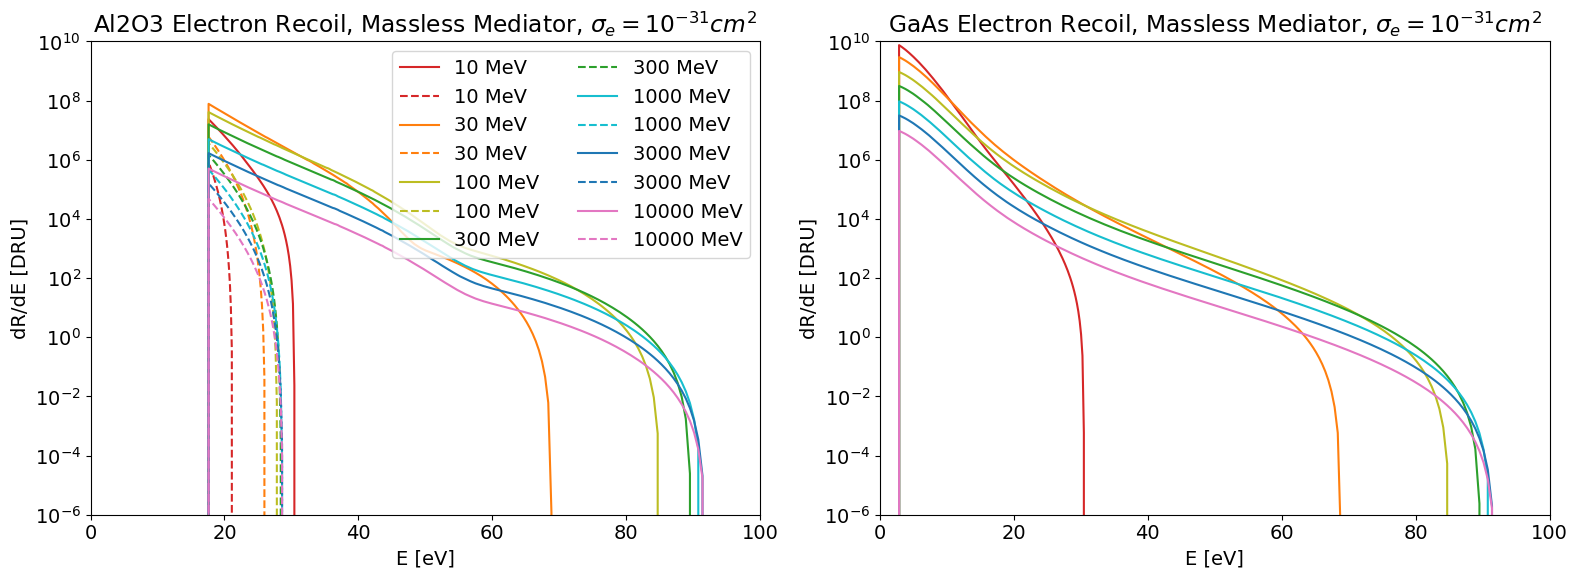

In [15]:
# Note the dimensional analysis in this cell
# DarkELF expects recoil energies and WIMP masses in eV, and returns rates in counts/kg/yr/eV
# But DarkLim expects recoil energies in keV, WIMP masses in GeV, and rates in counts/kg/day/keV (DRU)

mX_arr_eV = np.array([1e7, 3e7, 1e8, 3e8, 1e9, 3e9, 1e10])
color_arr = np.array(['#d62728', '#ff7f0e', '#bcbd22', '#2ca02c', '#17becf', '#1f77b4','#e377c2', '#9467bd', '#8c564b'])
keV_arr = np.geomspace(1e-4, 100e-3, 1000)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
for i, (mX, color) in enumerate(zip(mX_arr_eV, color_arr)):

    # Initialize each DarkELF object
    if i == 0:
        print('WARNING: You are suppressing DarkELF output')

    with io.capture_output() as captured:
        darkelf_sapphire = darkelf(target='Al2O3', filename="Al2O3_mermin.dat")

    darkelf_sapphire.update_params(mX=mX, mediator='massless')
    dRde_function = lambda keV : np.heaviside(keV * 1000 - 2 * darklim.constants.bandgap_Al203_eV, 1) * \
                                    darkelf_sapphire.dRdomega_electron(keV * 1000, method="grid", sigmae=1e-31, kcut=0, withscreening=True) / 365.25 * 1000
    dRdE_arr = dRde_function(keV_arr)

    axes[0].plot(keV_arr * 1000, dRdE_arr, label=f'{mX/1e6:.0f} MeV', color=color)

    with io.capture_output() as captured:
        darkelf_gaas = darkelf(target='GaAs', filename="GaAs_mermin.dat")

    darkelf_gaas.update_params(mX=mX, mediator='massless')
    dRde_function = lambda keV : np.heaviside(keV * 1000 - 2 * darklim.constants.bandgap_GaAs_eV, 1) * \
                                    darkelf_gaas.dRdomega_electron(keV * 1000, method="grid", sigmae=1e-31, kcut=0, withscreening=True) / 365.25 * 1000
    dRdE_arr = dRde_function(keV_arr)

    axes[1].plot(keV_arr * 1000, dRdE_arr, label=f'{mX/1e6:.0f} MeV', color=color)

for ax in axes:
    ax.set_yscale("log")
    ax.set_xlim([0, 100])
    ax.set_ylim([1e-6, 1e10])

    ax.set_xlabel("E [eV]")
    ax.set_ylabel("dR/dE [DRU]")

axes[0].set_title(r'Al2O3 Electron Recoil, Massless Mediator, $\sigma_e = 10^{-31} cm^2$')
axes[1].set_title(r'GaAs Electron Recoil, Massless Mediator, $\sigma_e = 10^{-31} cm^2$')

axes[0].legend(ncol=2, loc="upper right")

fig.tight_layout()
fig.show()

### DM-Electron Scattering, Massive Mediator

/var/folders/st/tlbg96ms2yn949bx7bk8hjc00000gn/T/ipykernel_12377/1801436035.py:74: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


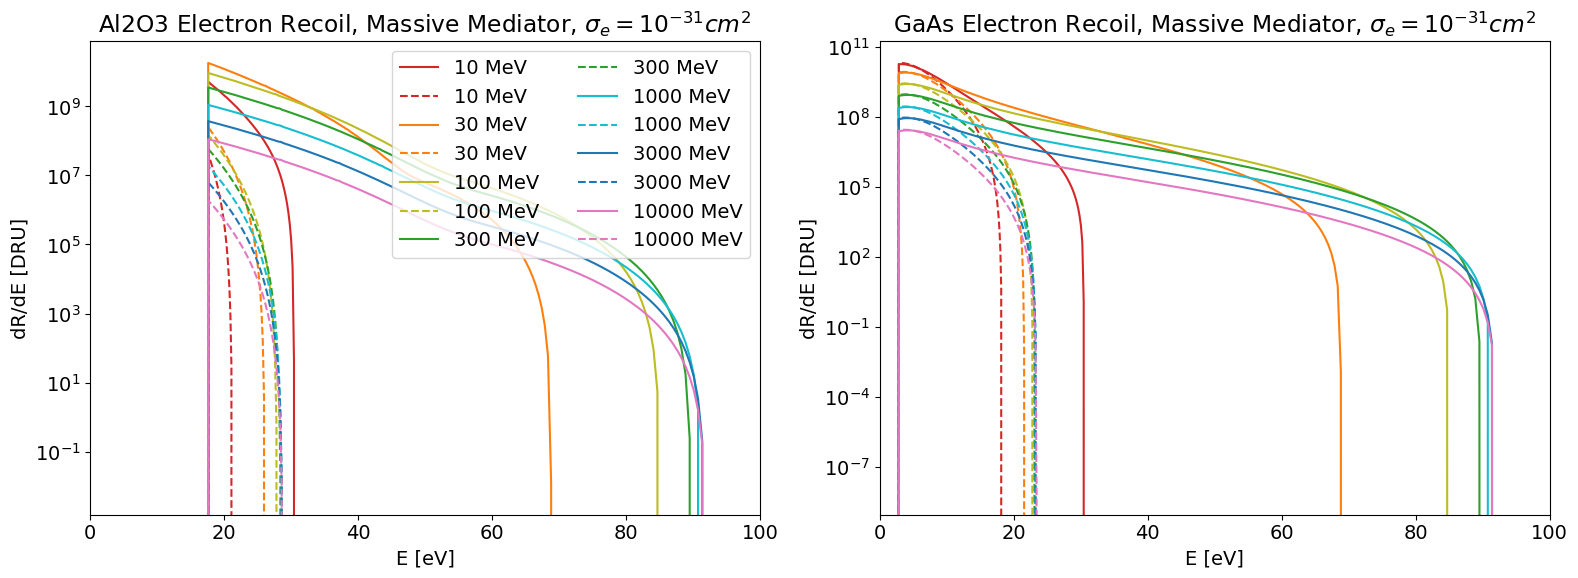

In [18]:
# Note the dimensional analysis in this cell
# DarkELF expects recoil energies and WIMP masses in eV, and returns rates in counts/kg/yr/eV
# But DarkLim expects recoil energies in keV, WIMP masses in GeV, and rates in counts/kg/day/keV (DRU)

mX_arr_eV = np.array([1e7, 3e7, 1e8, 3e8, 1e9, 3e9, 1e10])
color_arr = np.array(['#d62728', '#ff7f0e', '#bcbd22', '#2ca02c', '#17becf', '#1f77b4','#e377c2', '#9467bd', '#8c564b'])
keV_arr = np.geomspace(1e-4, 100e-3, 1000)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
for i, (mX, color) in enumerate(zip(mX_arr_eV, color_arr)):

    # Initialize each DarkELF object
    if i == 0:
        print('WARNING: You are suppressing DarkELF output')

    # Grid search Al2O3
    with io.capture_output() as captured:
        darkelf_sapphire = darkelf(target='Al2O3', filename="Al2O3_mermin.dat")

    darkelf_sapphire.update_params(mX=mX, mediator='massive')
    dRde_function = lambda keV : np.heaviside(keV * 1000 - 2 * darklim.constants.bandgap_Al203_eV, 1) * \
                                    darkelf_sapphire.dRdomega_electron(keV * 1000, method="grid", sigmae=1e-31, kcut=0, withscreening=True) / 365.25 * 1000
    dRdE_arr = dRde_function(keV_arr)

    axes[0].plot(keV_arr * 1000, dRdE_arr, label=f'{mX/1e6:.0f} MeV', color=color)

    # Lindhard Al2O3
    with io.capture_output() as captured:
        darkelf_sapphire = darkelf(target='Al2O3')

    darkelf_sapphire.update_params(mX=mX, mediator='massive')
    dRde_function = lambda keV : np.heaviside(keV * 1000 - 2 * darklim.constants.bandgap_Al203_eV, 1) * \
                                    darkelf_sapphire.dRdomega_electron(keV * 1000, method="Lindhard", sigmae=1e-31, kcut=0, withscreening=True) / 365.25 * 1000
    dRdE_arr = dRde_function(keV_arr)

    axes[0].plot(keV_arr * 1000, dRdE_arr, '--', label=f'{mX/1e6:.0f} MeV', color=color)

    # GaAs grid search
    with io.capture_output() as captured:
        darkelf_gaas = darkelf(target='GaAs', filename="GaAs_mermin.dat")

    darkelf_gaas.update_params(mX=mX, mediator='massive')
    dRde_function = lambda keV : np.heaviside(keV * 1000 - 2 * darklim.constants.bandgap_GaAs_eV, 1) * \
                                    darkelf_gaas.dRdomega_electron(keV * 1000, method="grid", sigmae=1e-31, kcut=0, withscreening=True) / 365.25 * 1000
    dRdE_arr = dRde_function(keV_arr)

    axes[1].plot(keV_arr * 1000, dRdE_arr, label=f'{mX/1e6:.0f} MeV', color=color)

    # Lindhard GaAs 
    with io.capture_output() as captured:
        darkelf_gaas = darkelf(target='GaAs')

    darkelf_gaas.update_params(mX=mX, mediator='massive')
    dRde_function = lambda keV : np.heaviside(keV * 1000 - 2 * darklim.constants.bandgap_GaAs_eV, 1) * \
                                    darkelf_gaas.dRdomega_electron(keV * 1000, method="Lindhard", sigmae=1e-31, kcut=0, withscreening=True) / 365.25 * 1000
    dRdE_arr = dRde_function(keV_arr)

    axes[1].plot(keV_arr * 1000, dRdE_arr, '--', label=f'{mX/1e6:.0f} MeV', color=color)

for ax in axes:
    ax.set_yscale("log")
    ax.set_xlim([0, 100])
#    ax.set_ylim([1e-2, 1e12])

    ax.set_xlabel("E [eV]")
    ax.set_ylabel("dR/dE [DRU]")

axes[0].set_title(r'Al2O3 Electron Recoil, Massive Mediator, $\sigma_e = 10^{-31} cm^2$')
axes[1].set_title(r'GaAs Electron Recoil, Massive Mediator, $\sigma_e = 10^{-31} cm^2$')

axes[0].legend(ncol=2, loc="upper right")

fig.tight_layout()
fig.show()

### DM Dark Photon Absorption

In [2]:
def kappa_limit(target,mX):
    scalar_input = np.isscalar(mX)
    mXlist = np.atleast_1d(mX)
    lim=[]
    
    for mX in mXlist:
        target.update_params(mX=mX)
        rate=target.R_absorption(kappa=1.0)
        if rate==0.0:
            lim.append(np.nan)
        else:
            lim.append(np.sqrt(3.0/rate))
            
    if(scalar_input):
        return lim[0]
    else:
        return np.array(lim) 

In [3]:
ge = darkelf(target='Ge',filename='Ge_gpaw_noLFE.dat',phonon_filename="Ge_epsphonon_data2K.dat")
simermin = darkelf(target='Si',filename='Si_mermin.dat',phonon_filename="Si_epsphonon_data6K.dat")
gemermin = darkelf(target='Ge',filename='Ge_mermin.dat',phonon_filename="Ge_epsphonon_data2K.dat")

GaAs = darkelf(target='GaAs',filename="GaAs_mermin.dat",phonon_filename="GaAs_epsphonon_data10K.dat")

Al2O3 = darkelf(target='Al2O3',filename="Al2O3_mermin.dat",phonon_filename="Al2O3_epsphonon_o.dat")
Al2O3_e = darkelf(target='Al2O3',targetyaml='Al2O3_extraordinary',filename="Al2O3_mermin.dat",phonon_filename="Al2O3_epsphonon_e.dat")


 .... Loading files for Ge
Loaded Ge_gpaw_noLFE.dat for epsilon in electron regime
electronic ELF taken or calculated from J. Enkovaara et al.,Electronic structure calculations with GPAW: a real-space implementation of the projector augmented-wave method,Journal of Physics:Condensed Matter22(2010) 253202.


/Users/vetri/GitRepos/DarkELF/darkelf/epsilon.py:44: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(inplace=True,method='bfill')# fill in some NaN values


phonon ELF taken or calculated from M. Ikezawa and T. Nanba, Two-Phonon Difference Absorption Spectra in Ge Crystals, Journal of  the Physical Society of Japan 45 (1978) 148.
Loaded Ge_epsphonon_data2K.dat for epsilon in phonon regime
Zion(k) for Migdal calculation taken or calculated from: P. J. Brown, A. G. Fox, E. N. Maslen, M. A. OKeefe,and B. T. M. Willis, “Intensity of diffracted intensities,” in International Tables for Crystallography (American Cancer Society, 2006) Chap. 6.1, pp. 554–595, https://onlinelibrary.wiley.com/doi/pdf/10.1107/97809553602060000
Loaded /Users/vetri/GitRepos/DarkELF/darkelf/../data/Ge/Ge_pDoS.dat for partial densities of states
Loaded /Users/vetri/GitRepos/DarkELF/darkelf/../data/Ge/Ge_Fn.dat for Fn(omega)
 .... Loading files for Si
Loaded Si_mermin.dat for epsilon in electron regime
electronic ELF taken or calculated from Y. Sun, H. Xu, B. Da, S.-f. Mao and Z.-j. Ding, Calculations of Energy-Loss Function for 26 Materials, Chinese Journal of Chemical P

/Users/vetri/GitRepos/DarkELF/darkelf/epsilon.py:44: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(inplace=True,method='bfill')# fill in some NaN values


 .... Loading files for Ge
Loaded Ge_mermin.dat for epsilon in electron regime
electronic ELF taken or calculated from M. Nov ́ak, L. K ̈ov ́er, S. Egri, I. Cserny, J. T ́oth, D. Varga et al., A simple statistical model for quantitative analysis of plasmon structures in xps and auger spectra of free-electron-like materials,Journal ofElectron Spectroscopy and Related Phenomena163(2008) 7
phonon ELF taken or calculated from M. Ikezawa and T. Nanba, Two-Phonon Difference Absorption Spectra in Ge Crystals, Journal of  the Physical Society of Japan 45 (1978) 148.
Loaded Ge_epsphonon_data2K.dat for epsilon in phonon regime
Zion(k) for Migdal calculation taken or calculated from: P. J. Brown, A. G. Fox, E. N. Maslen, M. A. OKeefe,and B. T. M. Willis, “Intensity of diffracted intensities,” in International Tables for Crystallography (American Cancer Society, 2006) Chap. 6.1, pp. 554–595, https://onlinelibrary.wiley.com/doi/pdf/10.1107/97809553602060000
Loaded /Users/vetri/GitRepos/DarkELF/dark

/Users/vetri/GitRepos/DarkELF/darkelf/epsilon.py:44: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(inplace=True,method='bfill')# fill in some NaN values


 .... Loading files for GaAs
Loaded GaAs_mermin.dat for epsilon in electron regime
electronic ELF taken or calculated from Y. Tu, C. Kwei and C. Tung,Angular and energy dependences of the surface excitation parameter for semiconducting iii–v compounds, Surface Science601(2007) 865.
phonon ELF taken or calculated from H.M. Lawler and E.L. Shirley, Anharmonic effects on infrared spectra of GaAs and gap:  First-principles calculations, Phys. Rev. B70(2004) 245209 and E.D. Palik, Gallium arsenide (gaas), in Handbook of Optical Constants of Solids, E.D. Palik, ed.,pp. 429–443, Elsevier (1985).
Loaded GaAs_epsphonon_data10K.dat for epsilon in phonon regime
Warning! Atomic Migdal calculation not present
Warning! Momentum dependent Zion for Migdal calculation not loaded. Using Z - number of valence electrons.
Loaded /Users/vetri/GitRepos/DarkELF/darkelf/../data/GaAs/Ga_pDoS.dat for partial densities of states
Loaded /Users/vetri/GitRepos/DarkELF/darkelf/../data/GaAs/As_pDoS.dat for partial den

/Users/vetri/GitRepos/DarkELF/darkelf/epsilon.py:44: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(inplace=True,method='bfill')# fill in some NaN values


 .... Loading files for Al2O3
Loaded Al2O3_mermin.dat for epsilon in electron regime
electronic ELF taken or calculated from Y. Sun, H. Xu, B. Da, S.-f. Mao and Z.-j. Ding, Calculations of Energy-Loss Function for 26 Materials, Chinese Journal of Chemical Physics9(2016) 663.
phonon ELF taken or calculated from  F. Gervais and B. Piriou, Anharmonicity in several-polar-mode crystals:  adjusting phonon self-energy of LO and TO modes in Al2O3 and TiO2 to fit infrared reflectivity,Journal of Physics C Solid State Physics 7 (1974) 2374 and M. Schubert, T.E. Tiwald and C.M. Herzinger, Infrared dielectric anisotropy and phonon modes of sapphire, Phys. Rev. B61(2000) 8187
Loaded Al2O3_epsphonon_o.dat for epsilon in phonon regime
Warning! Atomic Migdal calculation not present
Warning! Momentum dependent Zion for Migdal calculation not loaded. Using Z - number of valence electrons.
Warning, /Users/vetri/GitRepos/DarkELF/darkelf/../data/Al2O3/Al_atomic_Zion.dat does not exist! Must load in effecti

/Users/vetri/GitRepos/DarkELF/darkelf/epsilon.py:44: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(inplace=True,method='bfill')# fill in some NaN values


 .... Loading files for Al2O3
Loaded Al2O3_mermin.dat for epsilon in electron regime
electronic ELF taken or calculated from Y. Sun, H. Xu, B. Da, S.-f. Mao and Z.-j. Ding, Calculations of Energy-Loss Function for 26 Materials, Chinese Journal of Chemical Physics9(2016) 663.
phonon ELF taken or calculated from  F. Gervais and B. Piriou, Anharmonicity in several-polar-mode crystals:  adjusting phonon self-energy of LO and TO modes in Al2O3 and TiO2 to fit infrared reflectivity,Journal of Physics C Solid State Physics 7 (1974) 2374 and M. Schubert, T.E. Tiwald and C.M. Herzinger, Infrared dielectric anisotropy and phonon modes of sapphire, Phys. Rev. B61(2000) 8187
Loaded Al2O3_epsphonon_e.dat for epsilon in phonon regime
Warning! Atomic Migdal calculation not present
Warning! Momentum dependent Zion for Migdal calculation not loaded. Using Z - number of valence electrons.
Warning, /Users/vetri/GitRepos/DarkELF/darkelf/../data/Al2O3/Al_atomic_Zion.dat does not exist! Must load in effecti

/Users/vetri/GitRepos/DarkELF/darkelf/epsilon.py:44: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(inplace=True,method='bfill')# fill in some NaN values


/var/folders/st/tlbg96ms2yn949bx7bk8hjc00000gn/T/ipykernel_14442/4228469574.py:12: RuntimeWarning: invalid value encountered in sqrt
  lim.append(np.sqrt(3.0/rate))
/var/folders/st/tlbg96ms2yn949bx7bk8hjc00000gn/T/ipykernel_14442/1927280363.py:33: RankWarning: Polyfit may be poorly conditioned
  fitparam=np.polyfit(mVelectron[:-3],np.log10(a)[:-3],30) # need to smooth out Ge curve, due to numerical artifact


FileNotFoundError: kappa_limit_xenon.txt not found.

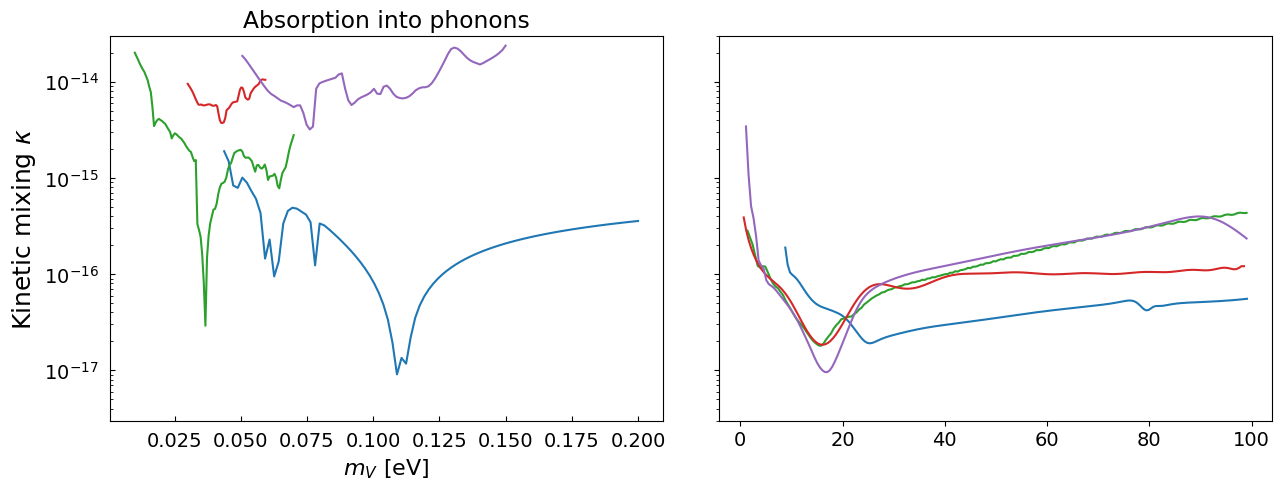

In [4]:

cmap = plt.get_cmap('tab10')
colors = cmap(np.linspace(0.0,1.0,10))

fig, axs = plt.subplots(1,2,figsize=(15,5),sharey=True)
fig.subplots_adjust(wspace=0.1)

props = dict(facecolor='white', alpha=0.9, edgecolor='white',boxstyle="square,pad=0.025")

# Al2O3
mVelectron = np.linspace(Al2O3.E_gap,100,200)
mVphonon = np.linspace(.03,.2,100)
a = kappa_limit(Al2O3,mVelectron)
axs[1].plot(mVelectron,a,color=colors[0],label=r'Al$_2$O$_3$')
b1 = kappa_limit(Al2O3,mVphonon)
b2 = kappa_limit(Al2O3_e,mVphonon)
b = pow(1./3*1./b1**2 + 2./3*1./b2**2,-0.5)
axs[0].plot(mVphonon,b,color=colors[0],label=r'Al$_2$O$_3$')


# GaAs
mVelectron = np.linspace(GaAs.E_gap,100,200)
mVphonon = np.linspace(.01,.07,100)
a = kappa_limit(GaAs,mVelectron)
axs[1].plot(mVelectron,a,color=colors[2],label='GaAs')
b = kappa_limit(GaAs,mVphonon)
axs[0].plot(mVphonon,b,color=colors[2],label='GaAs')


# Ge
mVelectron = np.linspace(gemermin.E_gap,100,200)
mVphonon = np.linspace(.03,.08,100)
a = kappa_limit(gemermin,mVelectron)
fitparam=np.polyfit(mVelectron[:-3],np.log10(a)[:-3],30) # need to smooth out Ge curve, due to numerical artifact
aa = (lambda mV: 10**np.poly1d(fitparam)(mV))
axs[1].plot(mVelectron[:-3],list(map(aa,mVelectron[:-3])),color=colors[3],label='Ge')
b = kappa_limit(gemermin,mVphonon)
axs[0].plot(mVphonon,b,color=colors[3],label='Ge')

# SI
mVelectron = np.linspace(simermin.E_gap,100,200)
mVphonon = np.linspace(.03,.15,100)
a = kappa_limit(simermin,mVelectron)
axs[1].plot(mVelectron,a,color=colors[4],label='Si')
b = kappa_limit(simermin,mVphonon)
axs[0].plot(mVphonon,b,color=colors[4],label='Si')



### Plot settings for left panel
axs[0].set_yscale('log')
axs[0].set_ylim([3e-18,3e-14])
axs[0].tick_params(direction='in',which='both',pad=8)
axs[0].set_xlabel(r'$m_V$ [eV]',fontsize=16)
axs[0].set_ylabel(r'Kinetic mixing $\kappa$',fontsize=18)

axs[0].set_title('Absorption into phonons')

### Plot settings for right panel
dat = np.loadtxt('kappa_limit_xenon.txt').T
axs[1].fill_between(dat[0],dat[1],dat[1]*0.0+1e-13,color='Silver',alpha=0.6)
dat = np.loadtxt('kappa_limit_SENSEI2020.txt').T
axs[1].fill_between(dat[0],dat[1],dat[1]*0.0+1e-13,color='Silver',alpha=0.6)
axs[1].text(30,1e-14,'XENON10/100',fontsize=10)
axs[1].text(10,1.2e-14,'SENSEI',fontsize=10)

axs[1].set_xlim([1.0,100])
axs[1].tick_params(direction='in',which='both',pad=8)
axs[1].set_xlabel(r'$m_V$ [eV]',fontsize=16)

lines = axs[1].get_lines()
#labelLines(lines,xvals=[65,70,52,55,17,43,45],fontsize=9,zorder=2.5,
#           ha='center',va='center',align=False,bbox=props)
axs[1].set_title('Absorption into $e^-$')

axs[0].legend(loc='best')

fig.savefig('plots/darkelf_absorption_1.pdf',bbox_inches='tight')

We try two methods of passing the DarkELF dRdomega_electron() function to DarkLim: defining an anonymous function in this Jupyter notebook, and getting an anonymous function from _sens_est.py. In theory, they are equivalent, but for some reason, only the latter method works. So the former method is grayed out, but we keep it for posterity.

Starting Experiment 0
  Finished mass 0, 0.01000 GeV. Found sigma = 3.110e-31 cm2.
  Finished mass 1, 0.01638 GeV. Found sigma = 1.150e-31 cm2.


KeyboardInterrupt: 

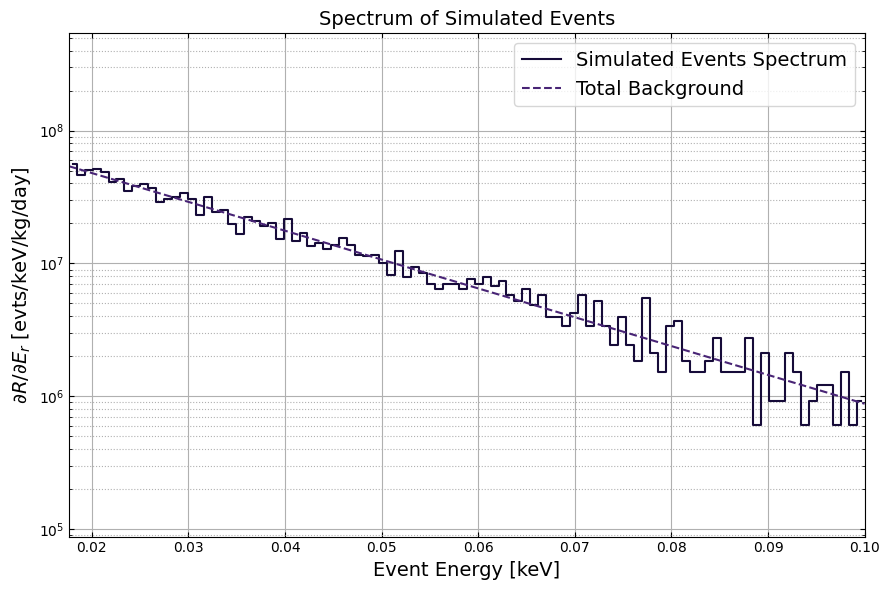

In [7]:
mX_arr_eV = np.geomspace(1e7, 1e10, 15)
mX_arr_GeV = mX_arr_eV / 1e9

# Run the simulation
t_start = time.time()
m_dm, sigs = SE.run_sim(
    threshold=max(energy_threshold, 2 * band_gap_sapphire_eV / 1000),
    e_low=max(energy_threshold, 2 * band_gap_sapphire_eV / 1000),
    e_high=0.1,
    m_dms=mX_arr_GeV,
    plot_bkgd=True,
    nexp=1, # increase for a better estimate, 1 is generally used for diagnostics
    sigma0=1e-31,
    elf_model='electron',
    elf_params={'mediator': 'massless', 'kcut': 0, 'suppress_darkelf_output': True},
)
sig = np.median(np.stack(sigs, axis=1), axis=1)
t_end = time.time()
print(f'Simulation took {(t_end - t_start):.2f} seconds')

fn = 'sapphire_results/Massless_ER_Limit_' + dt.datetime.now().strftime('%Y%m%d_%H%M%S') + '.txt'
np.savetxt(fn, np.vstack([m_dm, sig]).transpose(), fmt='%.3e')

f_out = open(fn + '_detailed', 'w')
f_out.write(str(m_dm))
f_out.write('\n')
f_out.write(str(sigs))
f_out.write('\n')
f_out.close()



fig, ax = plt.subplots(figsize=(9, 6))

ax.plot(m_dm, sig, color='b')

ax.set_xscale('log')
ax.set_yscale('log')

#ax.set_ylim(1e-37, 1e-32)
#ax.set_xlim(0.1, 10)
ax.set_xlabel("DM Mass [GeV]", fontsize=14)
ax.set_ylabel("Cross Section [cm$^2$]", fontsize=14)
ax.set_title("Estimated Sensitivity", fontsize=14)

ax.grid()
ax.grid(which="minor", linestyle='dotted')
ax.tick_params(which="both", direction="in", right=True, top=True)

fig.tight_layout()

### DM-Electron Scattering, Massive Mediator

10.0 MeV, 49.7 events above threshold
   After selecting k < 25 keV, 49.7 events above threshold
30.0 MeV, 387.8 events above threshold
   After selecting k < 25 keV, 380.7 events above threshold
100.0 MeV, 250.0 events above threshold
   After selecting k < 25 keV, 243.3 events above threshold
300.0 MeV, 101.1 events above threshold
   After selecting k < 25 keV, 98.2 events above threshold
1000.0 MeV, 32.4 events above threshold
   After selecting k < 25 keV, 31.4 events above threshold
3000.0 MeV, 11.0 events above threshold
   After selecting k < 25 keV, 10.7 events above threshold
10000.0 MeV, 3.3 events above threshold
   After selecting k < 25 keV, 3.2 events above threshold


/var/folders/st/tlbg96ms2yn949bx7bk8hjc00000gn/T/ipykernel_9657/3596589769.py:51: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


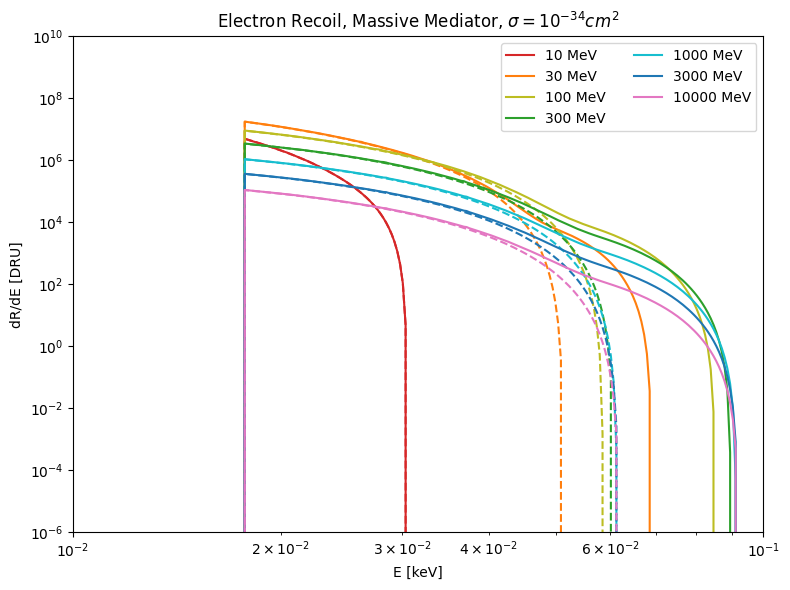

In [5]:
# Note the dimensional analysis in this cell
# DarkELF expects recoil energies and WIMP masses in eV, and returns rates in counts/kg/yr/eV
# But DarkLim expects recoil energies in keV, WIMP masses in GeV, and rates in counts/kg/day/keV (DRU)

mX_arr_eV = np.array([1e7, 3e7, 1e8, 3e8, 1e9, 3e9, 1e10])
color_arr = np.array(['#d62728', '#ff7f0e', '#bcbd22', '#2ca02c', '#17becf', '#1f77b4','#e377c2', '#9467bd', '#8c564b'])
keV_arr = np.geomspace(10e-3, 100e-3, 250)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
for i, (mX, color) in enumerate(zip(mX_arr_eV, color_arr)):

    # Initialize each DarkELF Al2O3 object
    if i == 0:
        print('WARNING: You are suppressing DarkELF output')
    with io.capture_output() as captured:
        darkelf_sapphire = darkelf(target='Al2O3', filename="Al2O3_mermin.dat")

    darkelf_sapphire.update_params(mX=mX, mediator='massive')

    # No cut on k
    dRde_function = lambda keV : np.heaviside(keV * 1000 - 2 * band_gap_sapphire_eV, 1) * \
                                    darkelf_sapphire.dRdomega_electron(keV * 1000, method="grid", sigmae=1e-34, kcut=0, withscreening=True) / 365.25 * 1000
    dRdE_arr = dRde_function(keV_arr)
    
    ax.plot(keV_arr, dRdE_arr, label=f'{mX/1e6:.0f} MeV', color=color)

    n_above_threshold = np.trapz(dRdE_arr[keV_arr > energy_threshold], keV_arr[keV_arr > energy_threshold]) * time_elapsed * mass_det
    print(f'{mX / 1e6} MeV, {n_above_threshold:.1f} events above threshold')

    # With a 25 keV cut on k (without cut, max k is 37 keV)
    dRde_function = lambda keV : np.heaviside(keV * 1000 - 2 * band_gap_sapphire_eV, 1) * \
                                    darkelf_sapphire.dRdomega_electron(keV * 1000, method="grid", sigmae=1e-34, kcut=25e3, withscreening=True) / 365.25 * 1000
    dRdE_arr = dRde_function(keV_arr)
    
    ax.plot(keV_arr, dRdE_arr, '--', color=color)

    n_above_threshold = np.trapz(dRdE_arr[keV_arr > energy_threshold], keV_arr[keV_arr > energy_threshold]) * time_elapsed * mass_det
    print(f'   After selecting k < 25 keV, {n_above_threshold:.1f} events above threshold')

ax.set_yscale("log")
ax.set_xscale('log')
ax.set_ylim([1e-6, 1e10])
ax.set_xlim([keV_arr[0], keV_arr[-1]])

ax.set_xlabel("E [keV]")
ax.set_ylabel("dR/dE [DRU]")
ax.set_title(r'Electron Recoil, Massive Mediator, $\sigma = 10^{-34} cm^2$')

ax.legend(ncol=2, fontsize=10, loc="upper right")
fig.tight_layout()
fig.show()

Starting Experiment 0
Simulated 3336 events
  Finished mass 0, 0.01000 GeV. Found sigma = 1.556e-33 cm2.
  Finished mass 1, 0.01638 GeV. Found sigma = 5.019e-34 cm2.
  Finished mass 2, 0.02683 GeV. Found sigma = 3.916e-34 cm2.
  Finished mass 3, 0.04394 GeV. Found sigma = 4.382e-34 cm2.
  Finished mass 4, 0.07197 GeV. Found sigma = 5.839e-34 cm2.
  Finished mass 5, 0.11788 GeV. Found sigma = 8.506e-34 cm2.
  Finished mass 6, 0.19307 GeV. Found sigma = 1.301e-33 cm2.
  Finished mass 7, 0.31623 GeV. Found sigma = 2.046e-33 cm2.
  Finished mass 8, 0.51795 GeV. Found sigma = 3.271e-33 cm2.
  Finished mass 9, 0.84834 GeV. Found sigma = 5.279e-33 cm2.
  Finished mass 10, 1.38950 GeV. Found sigma = 8.570e-33 cm2.
  Finished mass 11, 2.27585 GeV. Found sigma = 1.396e-32 cm2.
  Finished mass 12, 3.72759 GeV. Found sigma = 2.279e-32 cm2.
  Finished mass 13, 6.10540 GeV. Found sigma = 3.725e-32 cm2.
  Finished mass 14, 10.00000 GeV. Found sigma = 6.094e-32 cm2.

Simulation took 2213.48 seconds


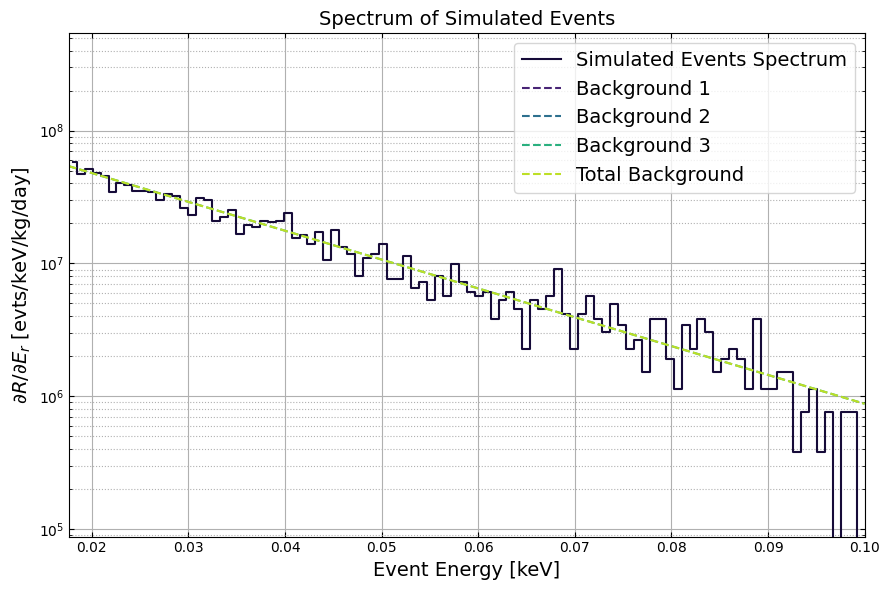

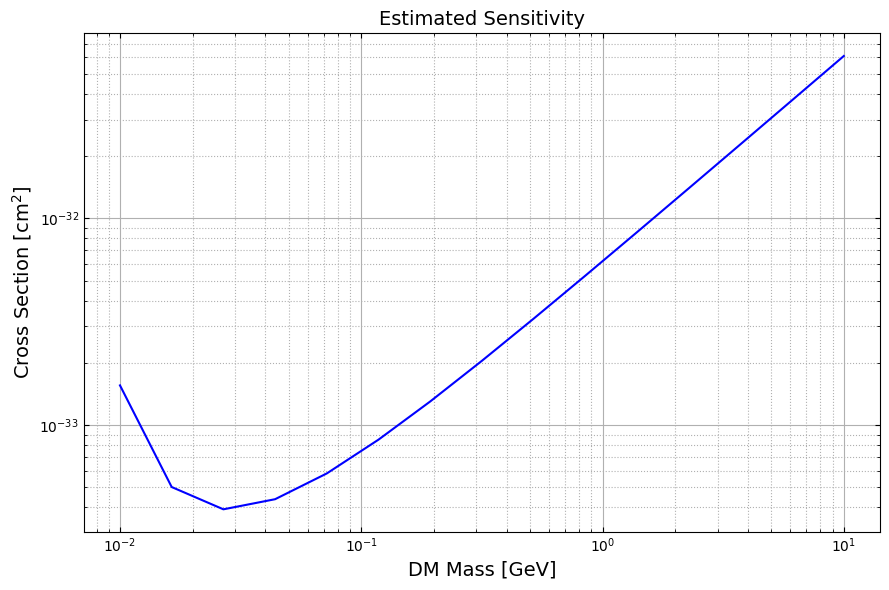

In [6]:
mX_arr_eV = np.geomspace(1e7, 1e10, 15)
mX_arr_GeV = mX_arr_eV / 1e9

# Run the simulation
t_start = time.time()
m_dm, sigs = SE.run_sim(
    threshold=max(energy_threshold, 2 * band_gap_sapphire_eV / 1000),
    e_low=max(energy_threshold, 2 * band_gap_sapphire_eV / 1000),
    e_high=0.1,
    m_dms=mX_arr_GeV,
    plot_bkgd=True,
    nexp=1, # increase for a better estimate, 1 is generally used for diagnostics
    sigma0=1e-31,
    elf_model='electron',
    elf_params={'mediator': 'massive', 'kcut': 0, 'suppress_darkelf_output': True},
)
sig = np.median(np.stack(sigs, axis=1), axis=1)
t_end = time.time()
print(f'Simulation took {(t_end - t_start):.2f} seconds')

fn = 'sapphire_results/Massive_ER_kcut_None_Limit_' + dt.datetime.now().strftime('%Y%m%d_%H%M%S') + '.txt'
np.savetxt(fn, np.vstack([m_dm, sig]).transpose(), fmt='%.3e')

f_out = open(fn + '_detailed', 'w')
f_out.write(str(m_dm))
f_out.write('\n')
f_out.write(str(sigs))
f_out.write('\n')
f_out.close()



fig, ax = plt.subplots(figsize=(9, 6))

ax.plot(m_dm, sig, color='b')

ax.set_xscale('log')
ax.set_yscale('log')

#ax.set_ylim(1e-37, 1e-32)
#ax.set_xlim(0.1, 10)
ax.set_xlabel("DM Mass [GeV]", fontsize=14)
ax.set_ylabel("Cross Section [cm$^2$]", fontsize=14)
ax.set_title("Estimated Sensitivity", fontsize=14)

ax.grid()
ax.grid(which="minor", linestyle='dotted')
ax.tick_params(which="both", direction="in", right=True, top=True)

fig.tight_layout()

Starting Experiment 0
Simulated 3287 events
  Finished mass 0, 0.01000 GeV. Found sigma = 1.404e-33 cm2.
  Finished mass 1, 0.01638 GeV. Found sigma = 4.801e-34 cm2.
  Finished mass 2, 0.02683 GeV. Found sigma = 3.789e-34 cm2.
  Finished mass 3, 0.04394 GeV. Found sigma = 4.219e-34 cm2.
  Finished mass 4, 0.07197 GeV. Found sigma = 5.604e-34 cm2.
  Finished mass 5, 0.11788 GeV. Found sigma = 8.151e-34 cm2.
  Finished mass 6, 0.19307 GeV. Found sigma = 1.246e-33 cm2.
  Finished mass 7, 0.31623 GeV. Found sigma = 1.958e-33 cm2.
  Finished mass 8, 0.51795 GeV. Found sigma = 3.130e-33 cm2.
  Finished mass 9, 0.84834 GeV. Found sigma = 5.050e-33 cm2.
  Finished mass 10, 1.38950 GeV. Found sigma = 8.198e-33 cm2.
  Finished mass 11, 2.27585 GeV. Found sigma = 1.335e-32 cm2.
  Finished mass 12, 3.72759 GeV. Found sigma = 2.180e-32 cm2.
  Finished mass 13, 6.10540 GeV. Found sigma = 3.563e-32 cm2.
  Finished mass 14, 10.00000 GeV. Found sigma = 5.829e-32 cm2.

Simulation took 1126.52 seconds


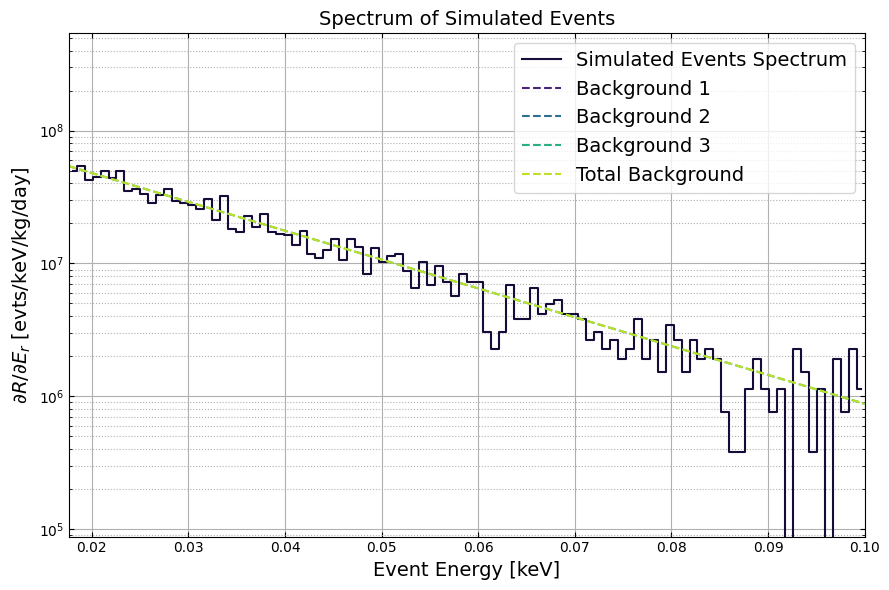

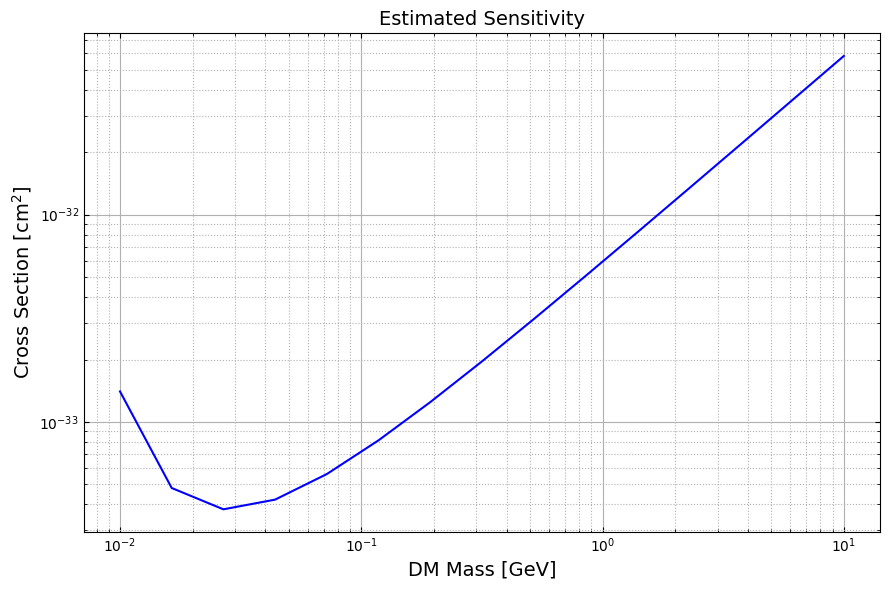

In [7]:
mX_arr_eV = np.geomspace(1e7, 1e10, 15)
mX_arr_GeV = mX_arr_eV / 1e9

# Run the simulation
t_start = time.time()
m_dm, sigs = SE.run_sim(
    threshold=max(energy_threshold, 2 * band_gap_sapphire_eV / 1000),
    e_low=max(energy_threshold, 2 * band_gap_sapphire_eV / 1000),
    e_high=0.1,
    m_dms=mX_arr_GeV,
    plot_bkgd=True,
    nexp=1, # increase for a better estimate, 1 is generally used for diagnostics
    sigma0=1e-31,
    elf_model='electron',
    elf_params={'mediator': 'massive', 'kcut': 25e3, 'suppress_darkelf_output': True},
)
sig = np.median(np.stack(sigs, axis=1), axis=1)
t_end = time.time()
print(f'Simulation took {(t_end - t_start):.2f} seconds')

fn = 'sapphire_results/Massive_ER_kcut_25keV_Limit_' + dt.datetime.now().strftime('%Y%m%d_%H%M%S') + '.txt'
np.savetxt(fn, np.vstack([m_dm, sig]).transpose(), fmt='%.3e')

f_out = open(fn + '_detailed', 'w')
f_out.write(str(m_dm))
f_out.write('\n')
f_out.write(str(sigs))
f_out.write('\n')
f_out.close()



fig, ax = plt.subplots(figsize=(9, 6))

ax.plot(m_dm, sig, color='b')

ax.set_xscale('log')
ax.set_yscale('log')

#ax.set_ylim(1e-37, 1e-32)
#ax.set_xlim(0.1, 10)
ax.set_xlabel("DM Mass [GeV]", fontsize=14)
ax.set_ylabel("Cross Section [cm$^2$]", fontsize=14)
ax.set_title("Estimated Sensitivity", fontsize=14)

ax.grid()
ax.grid(which="minor", linestyle='dotted')
ax.tick_params(which="both", direction="in", right=True, top=True)

fig.tight_layout()